### Question 5

Recreate the Covid data source from the two .csv. files that you can download from the page Recreating the COVID Data Source from Scratch in this module

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [231]:
import pandas as pd
df_2020 = pd.read_csv('2020 Cases Only.csv')

C:\Users\ankit\AppData\Local\Temp\ipykernel_25448\1873903093.py:2: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv('2020 Cases Only.csv')


In [232]:
df_2020 = pd.read_csv('2020 Cases Only.csv', low_memory=False)
df_2021 = pd.read_csv('2021 Cases Only.csv', low_memory = False)

### Combine the 2 dataframes

In [233]:
df_all = pd.concat([df_2020, df_2021])

In [234]:
c_all = df_all.groupby(['EventDate']).count()

In [235]:
print(c_all.head)

<bound method NDFrame.head of            OBJECTID  County    Age  Age_group  Gender  Jurisdicti  Travel_rel  \
EventDate                                                                       
1/1/2020          0      21     21         21      21          21          21   
1/1/2021          0   13720  13719      13720   13720       13720       13720   
1/10/2020         0       2      2          2       2           2           2   
1/10/2021         0   11694  11693      11694   11694       11694       11694   
1/11/2021         0   14249  14245      14249   14249       14249       14249   
...             ...     ...    ...        ...     ...         ...         ...   
9/5/2020          0    2545   2544       2545    2545        2545        2545   
9/6/2020          0    2217   2217       2217    2217        2217        2217   
9/7/2020          0    2478   2477       2478    2478        2478        2478   
9/8/2020          0    2699   2698       2699    2699        2699        2699  

In [237]:
c_all.index = pd.to_datetime(c_all.index, format="%m/%d/%Y")

In [238]:
c_sorted = c_all.sort_index(axis='index', ascending=True)

In [239]:
print(c_all.head)

<bound method NDFrame.head of             OBJECTID  County    Age  Age_group  Gender  Jurisdicti  \
EventDate                                                            
2020-01-01         0      21     21         21      21          21   
2021-01-01         0   13720  13719      13720   13720       13720   
2020-01-10         0       2      2          2       2           2   
2021-01-10         0   11694  11693      11694   11694       11694   
2021-01-11         0   14249  14245      14249   14249       14249   
...              ...     ...    ...        ...     ...         ...   
2020-09-05         0    2545   2544       2545    2545        2545   
2020-09-06         0    2217   2217       2217    2217        2217   
2020-09-07         0    2478   2477       2478    2478        2478   
2020-09-08         0    2699   2698       2699    2699        2699   
2020-09-09         0    2491   2489       2491    2491        2491   

            Travel_rel  Origin  EDvisit  Hospitaliz  Died  

### Question 6
Use the matplotlib.pyplot package to create a 2 by 2 visualization.  The first row should show the daily cases and the moving average for Dade County, and the second row should show this information for Orange County.  Note that you will first have to extract the data for the two counties from the data source you created in 5 (15 points).

[]

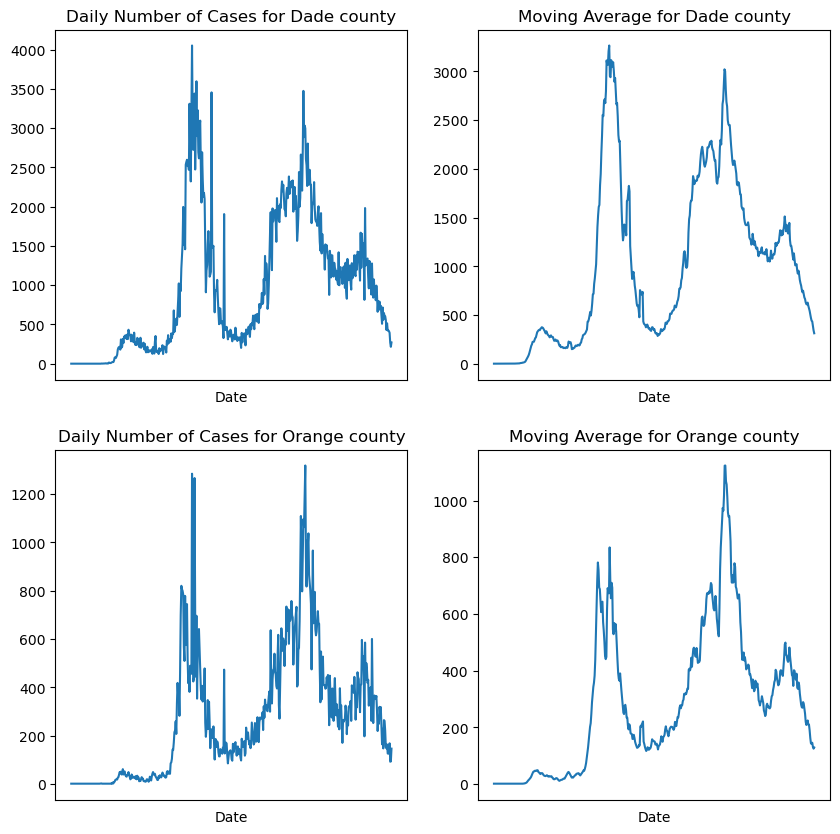

In [246]:
# Filter data for Dade county
data_dade = df_all[df_all['County'].isin(['Dade'])]
 
# Filter data for Orange county    
data_orange = df_all[df_all['County'].isin(['Orange'])]
 
# Process data for Dade county
data_dade_count = data_dade.groupby(['EventDate']).count()
 
data_dade_count.index = pd.to_datetime(data_dade_count.index, format="%m/%d/%Y")
 
data_dade_count_sorted = data_dade_count.sort_index(axis='index', ascending=True)
 
data_dade_count_sorted['Date'] = data_dade_count_sorted.index.values
 
data_dade_count_sorted['Daily Cases'] = data_dade_count_sorted['County']
 
dade = data_dade_count_sorted
 
    
# Process data for Orange county
data_orange_count = data_orange.groupby(['EventDate']).count()
 
data_orange_count.index = pd.to_datetime(data_orange_count.index, format="%m/%d/%Y")
 
data_orange_count_sorted = data_orange_count.sort_index(axis='index', ascending=True)
 
data_orange_count_sorted['Date'] = data_orange_count_sorted.index.values
 
data_orange_count_sorted['Daily Cases'] = data_orange_count_sorted['County']
 
orange = data_orange_count_sorted


# Calculate moving average for Dade county 
dade['Moving Average'] = dade['Daily Cases'].rolling(5).mean()

# Calculate moving average for Orange county
orange['Moving Average'] = orange['Daily Cases'].rolling(5).mean()
 
# Plotting    
fig, h_axes = plt.subplots(2,2,figsize=[10,10])
 
plt.sca(h_axes[0,0])
 
plt.plot(dade['Date'], dade['Daily Cases'])
 
h_axes[0,0].set_title('Daily Number of Cases for Dade county')

h_axes[0,0].set_xlabel('Date')

h_axes[0,0].set_xticks([])
 
plt.sca(h_axes[0,1])
 
plt.plot(dade['Date'], dade['Moving Average'])
 
h_axes[0,1].set_title('Moving Average for Dade county')

h_axes[0,1].set_xlabel('Date')

h_axes[0,1].set_xticks([])
 
plt.sca(h_axes[1,0])
 
plt.plot(orange['Date'], orange['Daily Cases'])
 
h_axes[1,0].set_title('Daily Number of Cases for Orange county')

h_axes[1,0].set_xlabel('Date')

h_axes[1,0].set_xticks([])
 
plt.sca(h_axes[1,1])
 
plt.plot(orange['Date'], orange['Moving Average'])
 
h_axes[1,1].set_title('Moving Average for Orange county')

h_axes[1,1].set_xlabel('Date')

h_axes[1,1].set_xticks([])
